<style>
  h1 {
    font-family: Georgia, serif;
    font-size: 2.5em; /* 1em is typically the default size of the parent element */
  }

  h2 {
    font-family: Arial, sans-serif;
    font-size: 1.8em;
    color: #333;
  }
</style>


# <span style="font-family: 'Georgia', serif;"> Project 1: Genome Assembly - Report</span>
### <span style="font-family: 'Georgia', serif;"> Addison Yam</span>
### <span style="font-family: 'Georgia', serif;"> BF528 - Genomic Data Analysis</span>
### <span style="font-family: 'Georgia', serif;">September 28th, 2025 </span>

<span style="font-family: 'Georgia', serif;"> Here lies the report of establishing a nextflow pipeline capable of assembling the genome of a bacteria as well as analyzing the consequences and output of said assembly. </span>

## <span style="font-family: 'Georgia', serif;"> Methods </span>
<span style="font-family: 'Georgia', serif;"> The bacterial genome of Alteromonas mecleodii was assembled through a pipeline and analyzed. </span>

<span style="font-family: 'Georgia', serif;"> This pipeline started off with getting the reads and quality control. Long and short reads were acquired and initial quality control was performed using FastQC v0.12.1 (on default parameters) [1] was run on the short reads. Filtlong v0.3.0 (minimum length at 500 and 90% kept) [2] was run on the long reads for quality control. Flye v2.9.6 (on parameters set to correct nanopore reads) [3] was run on the filtered long reads for assembly. </span>

<span style="font-family: 'Georgia', serif;"> After assembly, create an index of the assembly, align the short reads to the assembly, and sort and index the alignments with Bowtie2 v2.5.4 [4] and samtools v1.22.1 (on default parameters) [5]. Using the alignments, short-read polish with Pilon v1.24 (with default parameters) [6]. </span>

<span style="font-family: 'Georgia', serif;"> Annote the polished assembly with Prokka v1.14.6 (on default parameters) [7]. Run BUSCO v6.0.0 (set to the alteromonas_odb12 lineage) [8] on the polished assembly to evaluate completeness. After downloading the canoical reference genome from NCBI RefSeq assembly (GCF_000172635.2) with NCBI-datasets-cli tool v18.6.0 (on default parameters) [9], run QUAST v5.3.0 (on default parameters) [10] twice comparing the final assembly with the reference genome as well as the unpolished assembly. </span>

## <span style="font-family: 'Georgia', serif;"> Results </span>
### <span style="font-family: 'Georgia', serif;"> Task Number 1 - Construction of a Circos Plot from the GFF file generated by Prokka </span>

### <span style='font-family: Georgia, serif;'>1. Unintelligible Circos Plot (circos_plot1.png)</span>

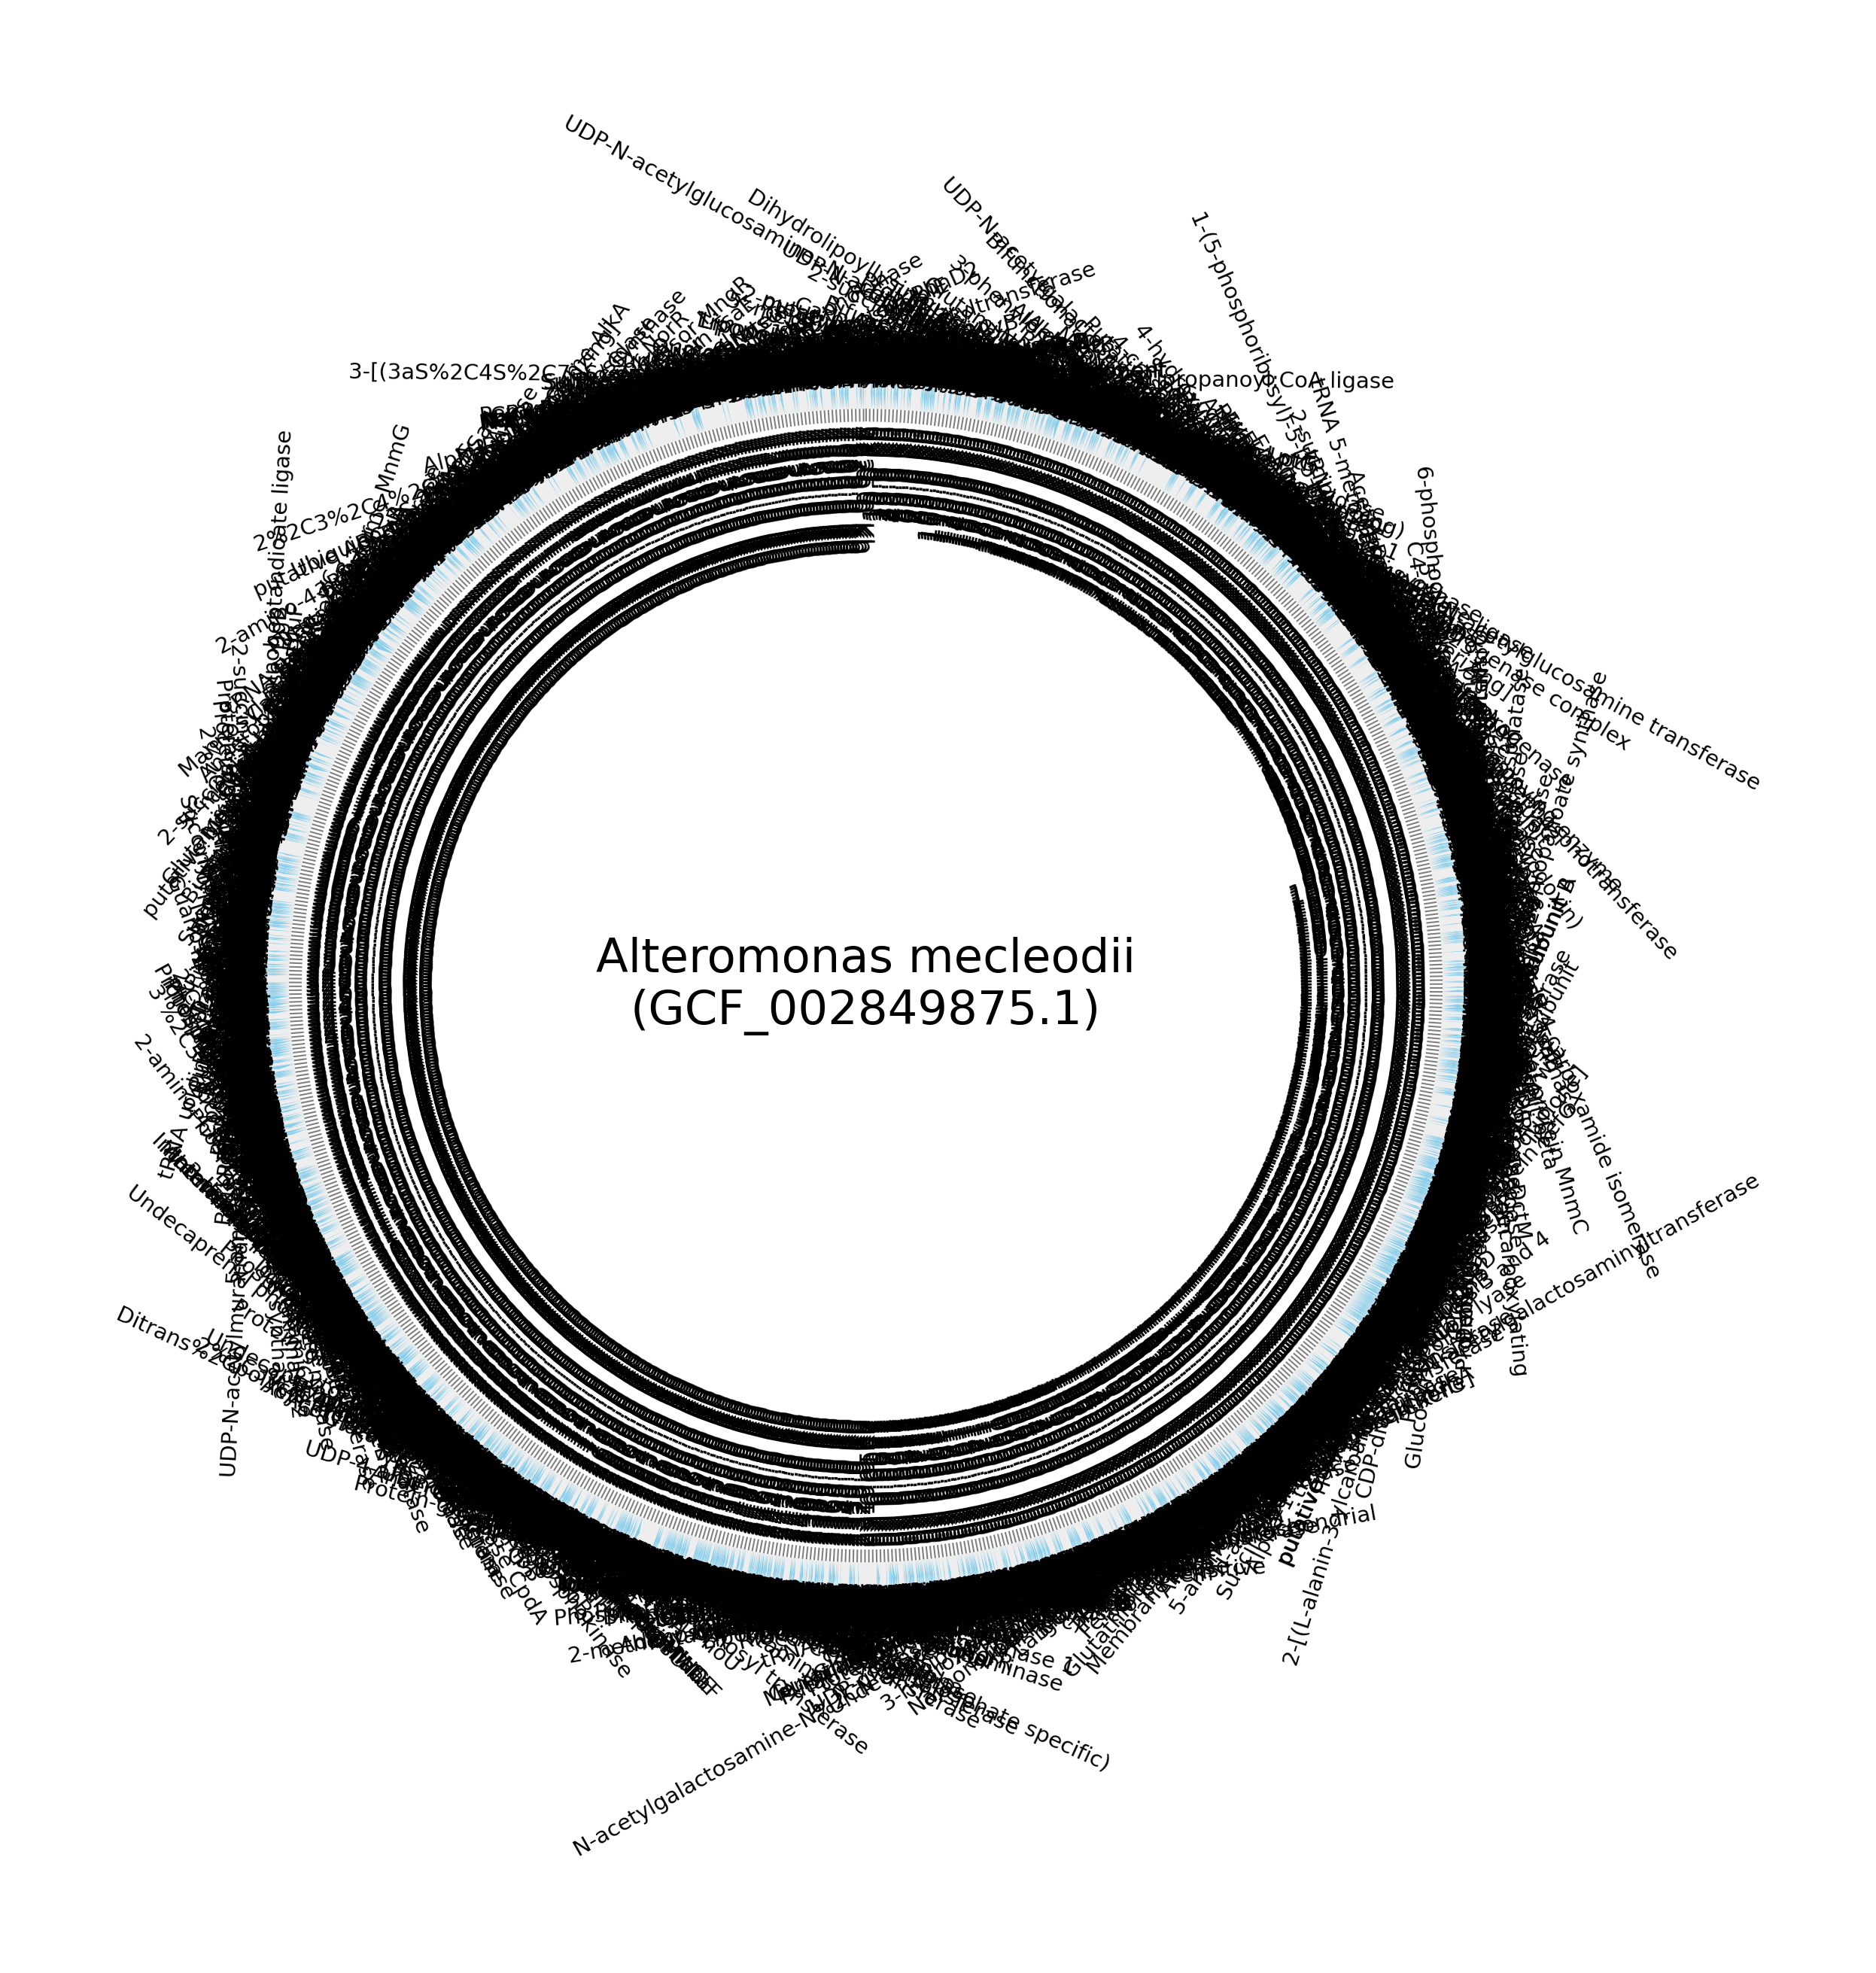


### <span style='font-family: Georgia, serif;'>2. Reasonable Circos Plot (circos_plot2.png)</span>

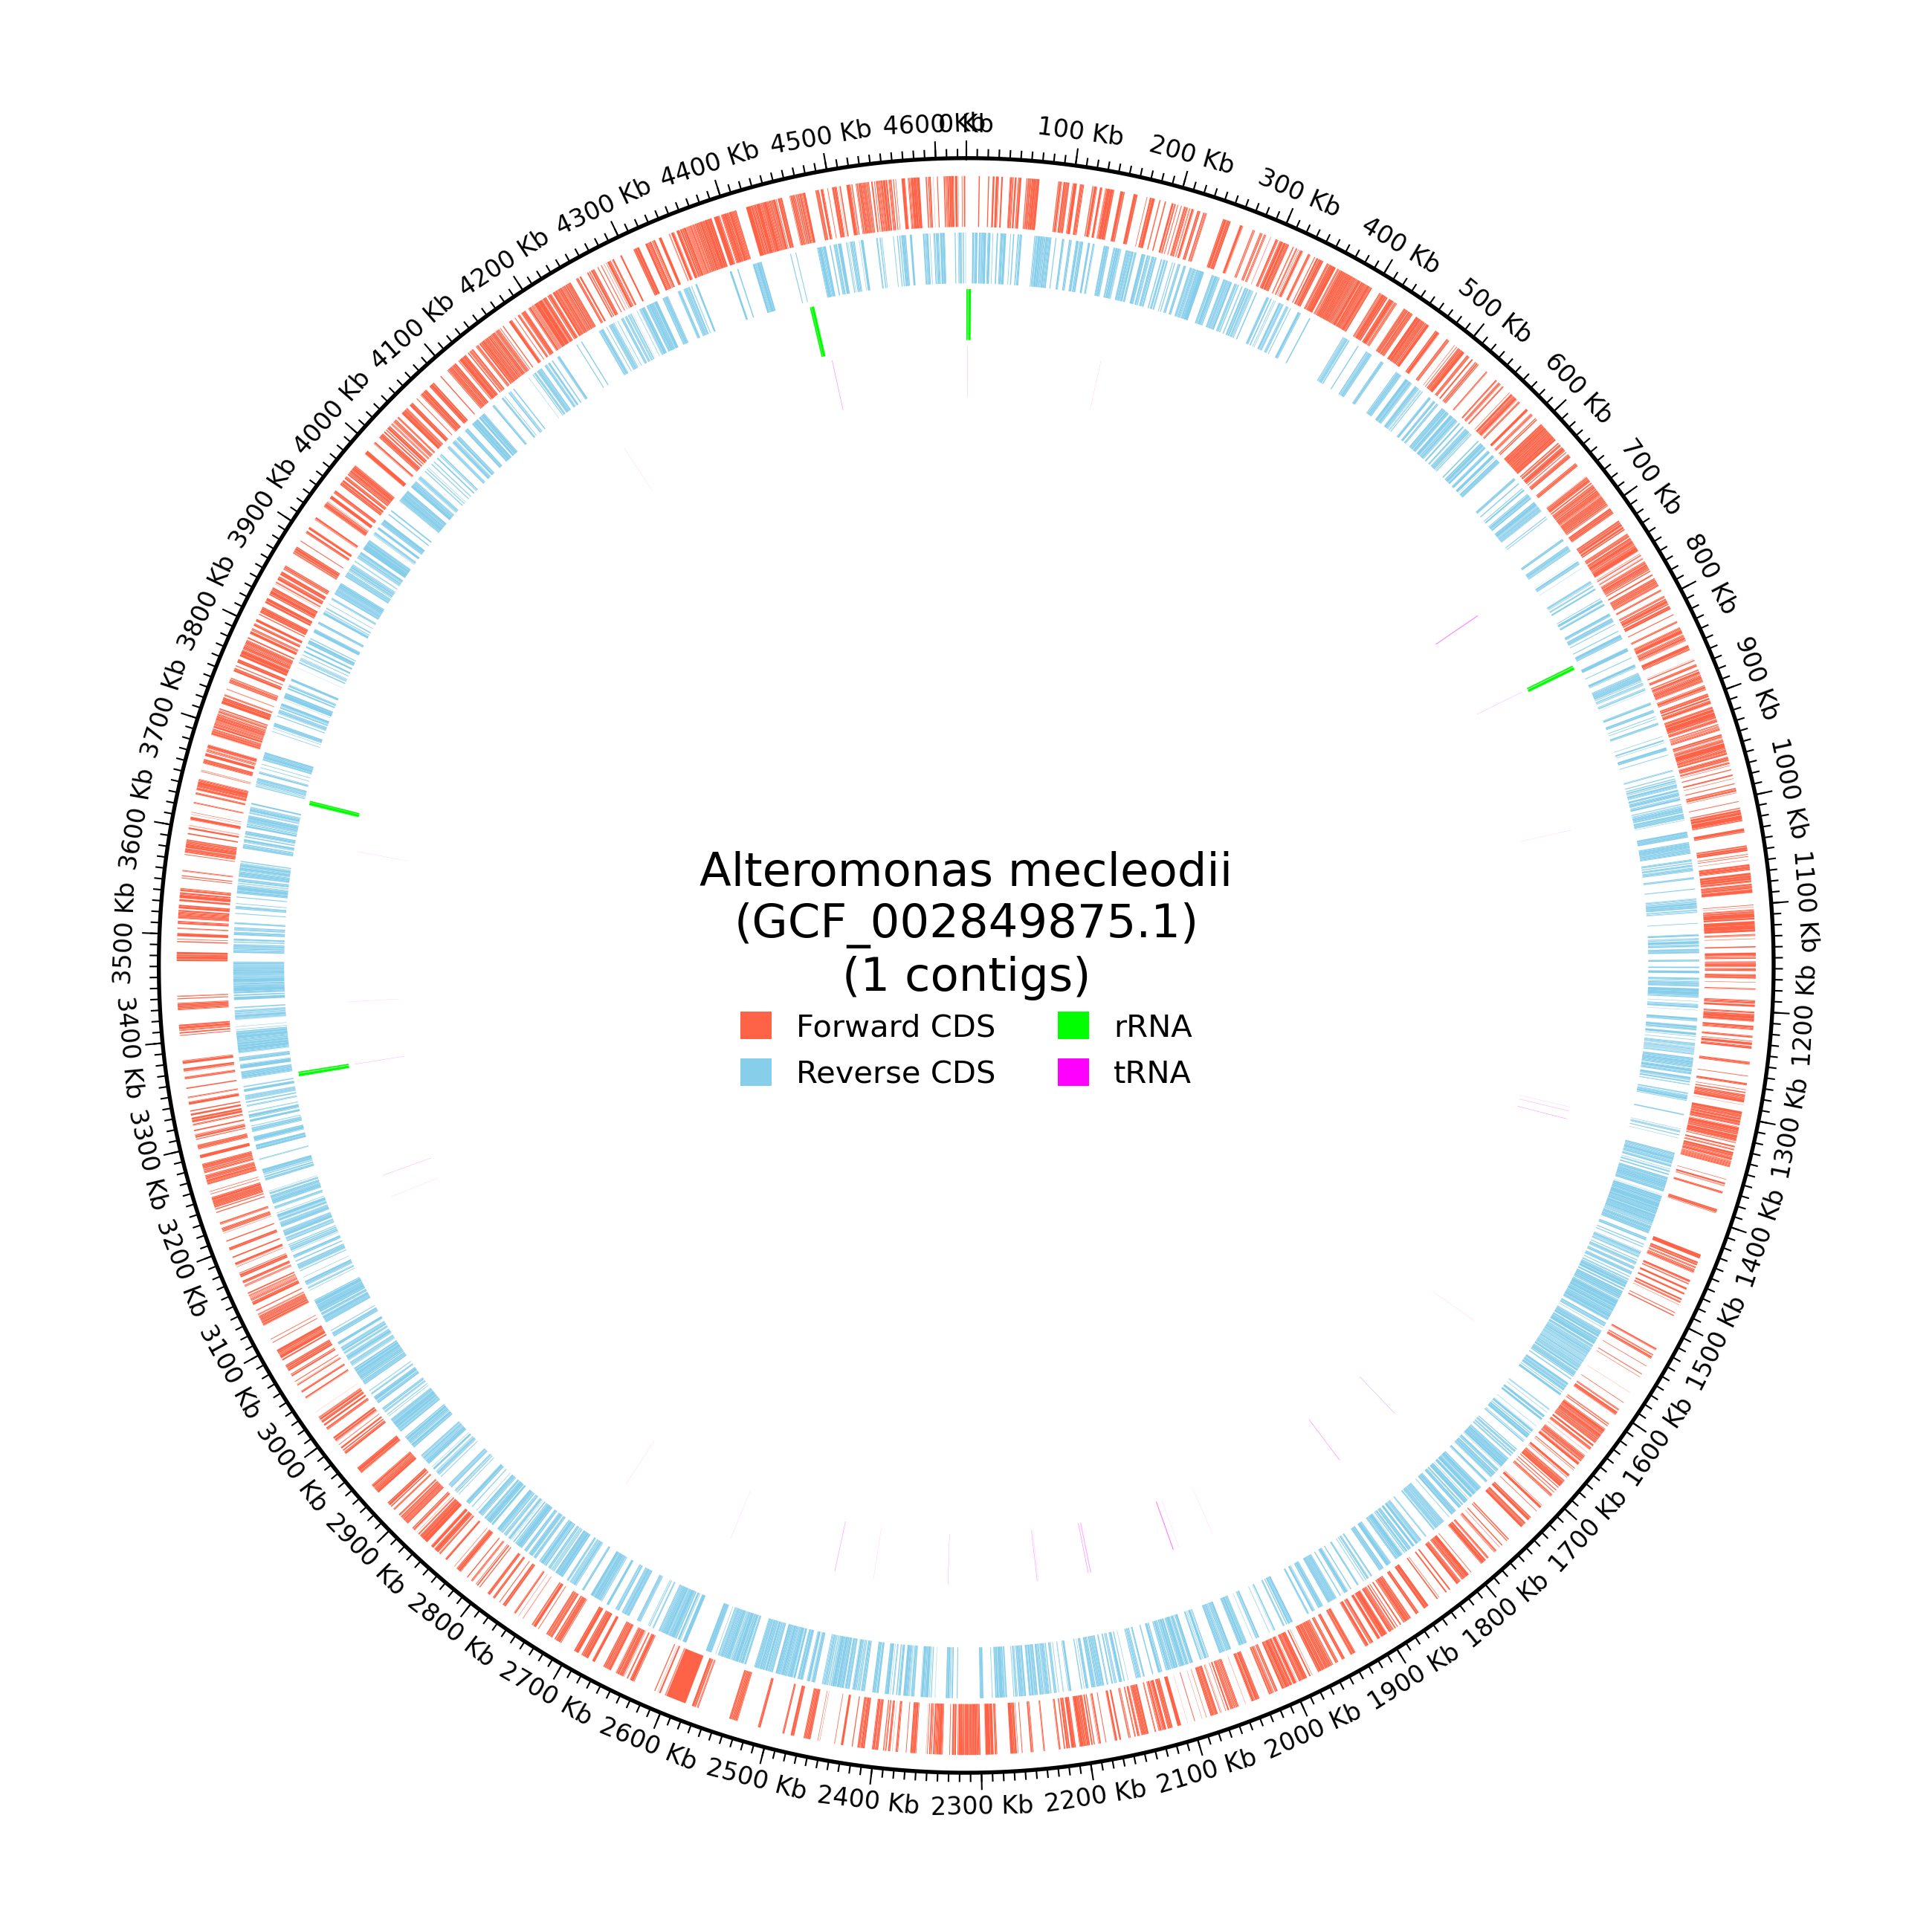

In [17]:
import os
from IPython.display import display, Markdown, Image

image1_filename = "circos_plot1.png"
image2_filename = "circos_plot2.png"

display(Markdown(f"### <span style='font-family: Georgia, serif;'>1. Unintelligible Circos Plot ({image1_filename})</span>"))
try:
    # Check if file exists before trying to display it
    if os.path.exists(image1_filename):
        display(Image(filename=image1_filename, width=600))
    else:
        display(Markdown(f"**ERROR:** Image file not found at: `{image1_filename}`"))
except Exception as e:
    display(Markdown(f"An error occurred displaying `{image1_filename}`: {e}"))

display(Markdown(f"\n### <span style='font-family: Georgia, serif;'>2. Reasonable Circos Plot ({image2_filename})</span>"))
try:
    if os.path.exists(image2_filename):
        display(Image(filename=image2_filename, width=600))
    else:
        display(Markdown(f"**ERROR:** Image file not found at: `{image2_filename}`"))
except Exception as e:
    display(Markdown(f"An error occurred displaying `{image2_filename}`: {e}"))

### <span style="font-family: 'Georgia', serif;"> Task Number 2 - Report QUAST findings for polished assembly d3</span>

<span style="font-family: 'Georgia', serif;"> Polished Assembly Statistics: </span>

<ul style="font-family: 'Georgia', serif;">
    <li>Genome fraction: 98.429%</li>
    <li>Duplication ratio: 1.001 </li>
    <li>Number of misassemblies: 19</li>
    <li>Number of mismatches per 100kbp: 18.18</li>
    <li>Total length of Assembly: 4627920</li>
    <li>GC Content: 44.70%</li>
</ul>

### <span style="font-family: 'Georgia', serif;"> Task Number 3 - Report QUAST differences between polished and unpolished assemblies 29 </span>

<span style="font-family: 'Georgia', serif;"> Differences in the Unpolished: </span>

<ul style="font-family: 'Georgia', serif;">
    <li>Number of mismatches per 100kbp: 18.33</li>
</ul>

<span style="font-family: 'Georgia', serif;"> Everything else is the same as the polished. </span>


### <span style="font-family: 'Georgia', serif;"> Task Number 4 - Report BUSCO findings </span>

<span style="font-family: 'Georgia', serif;"> BUSCO Results: C:99.6%[S:99.5%,D:0.1%],F:0.0%,M:0.4%,n:1828 </span>

<span style="font-family: 'Georgia', serif; font-size: 18px;"> What BUSCO is doing?  </span>

<span style="font-family: 'Georgia', serif;"> BUSCO stands for Benchmarking Universal Single-Copy Orthologs and is a tool to measure how 'complete' and accurate a genome assembly is based on the expected gene content. There are a list of expected genes that should be present for a specific species/lineage. Having more of there is of these genes can tell us whether there was a problem throughout assembly or sequencing or another process involved. From C:99.6%[S:99.5%,D:0.1%],F:0.0%,M:0.4%,n:1828, this means 99.6% of the expected gene content for this lineage is found, 99.5% of the genes present were single, full copies, 0.1% of the genes present were found multiple times, 0.0% of genes are fragemented (so the assembly is pretty continous), 0.4% of expected gene content for this lineage isn't found, and 1828 BUSCO genes were used for this analysis. </span>


### <span style='font-family: Georgia, serif;'>2. BUSCO Plot (busco_figure.png)</span>

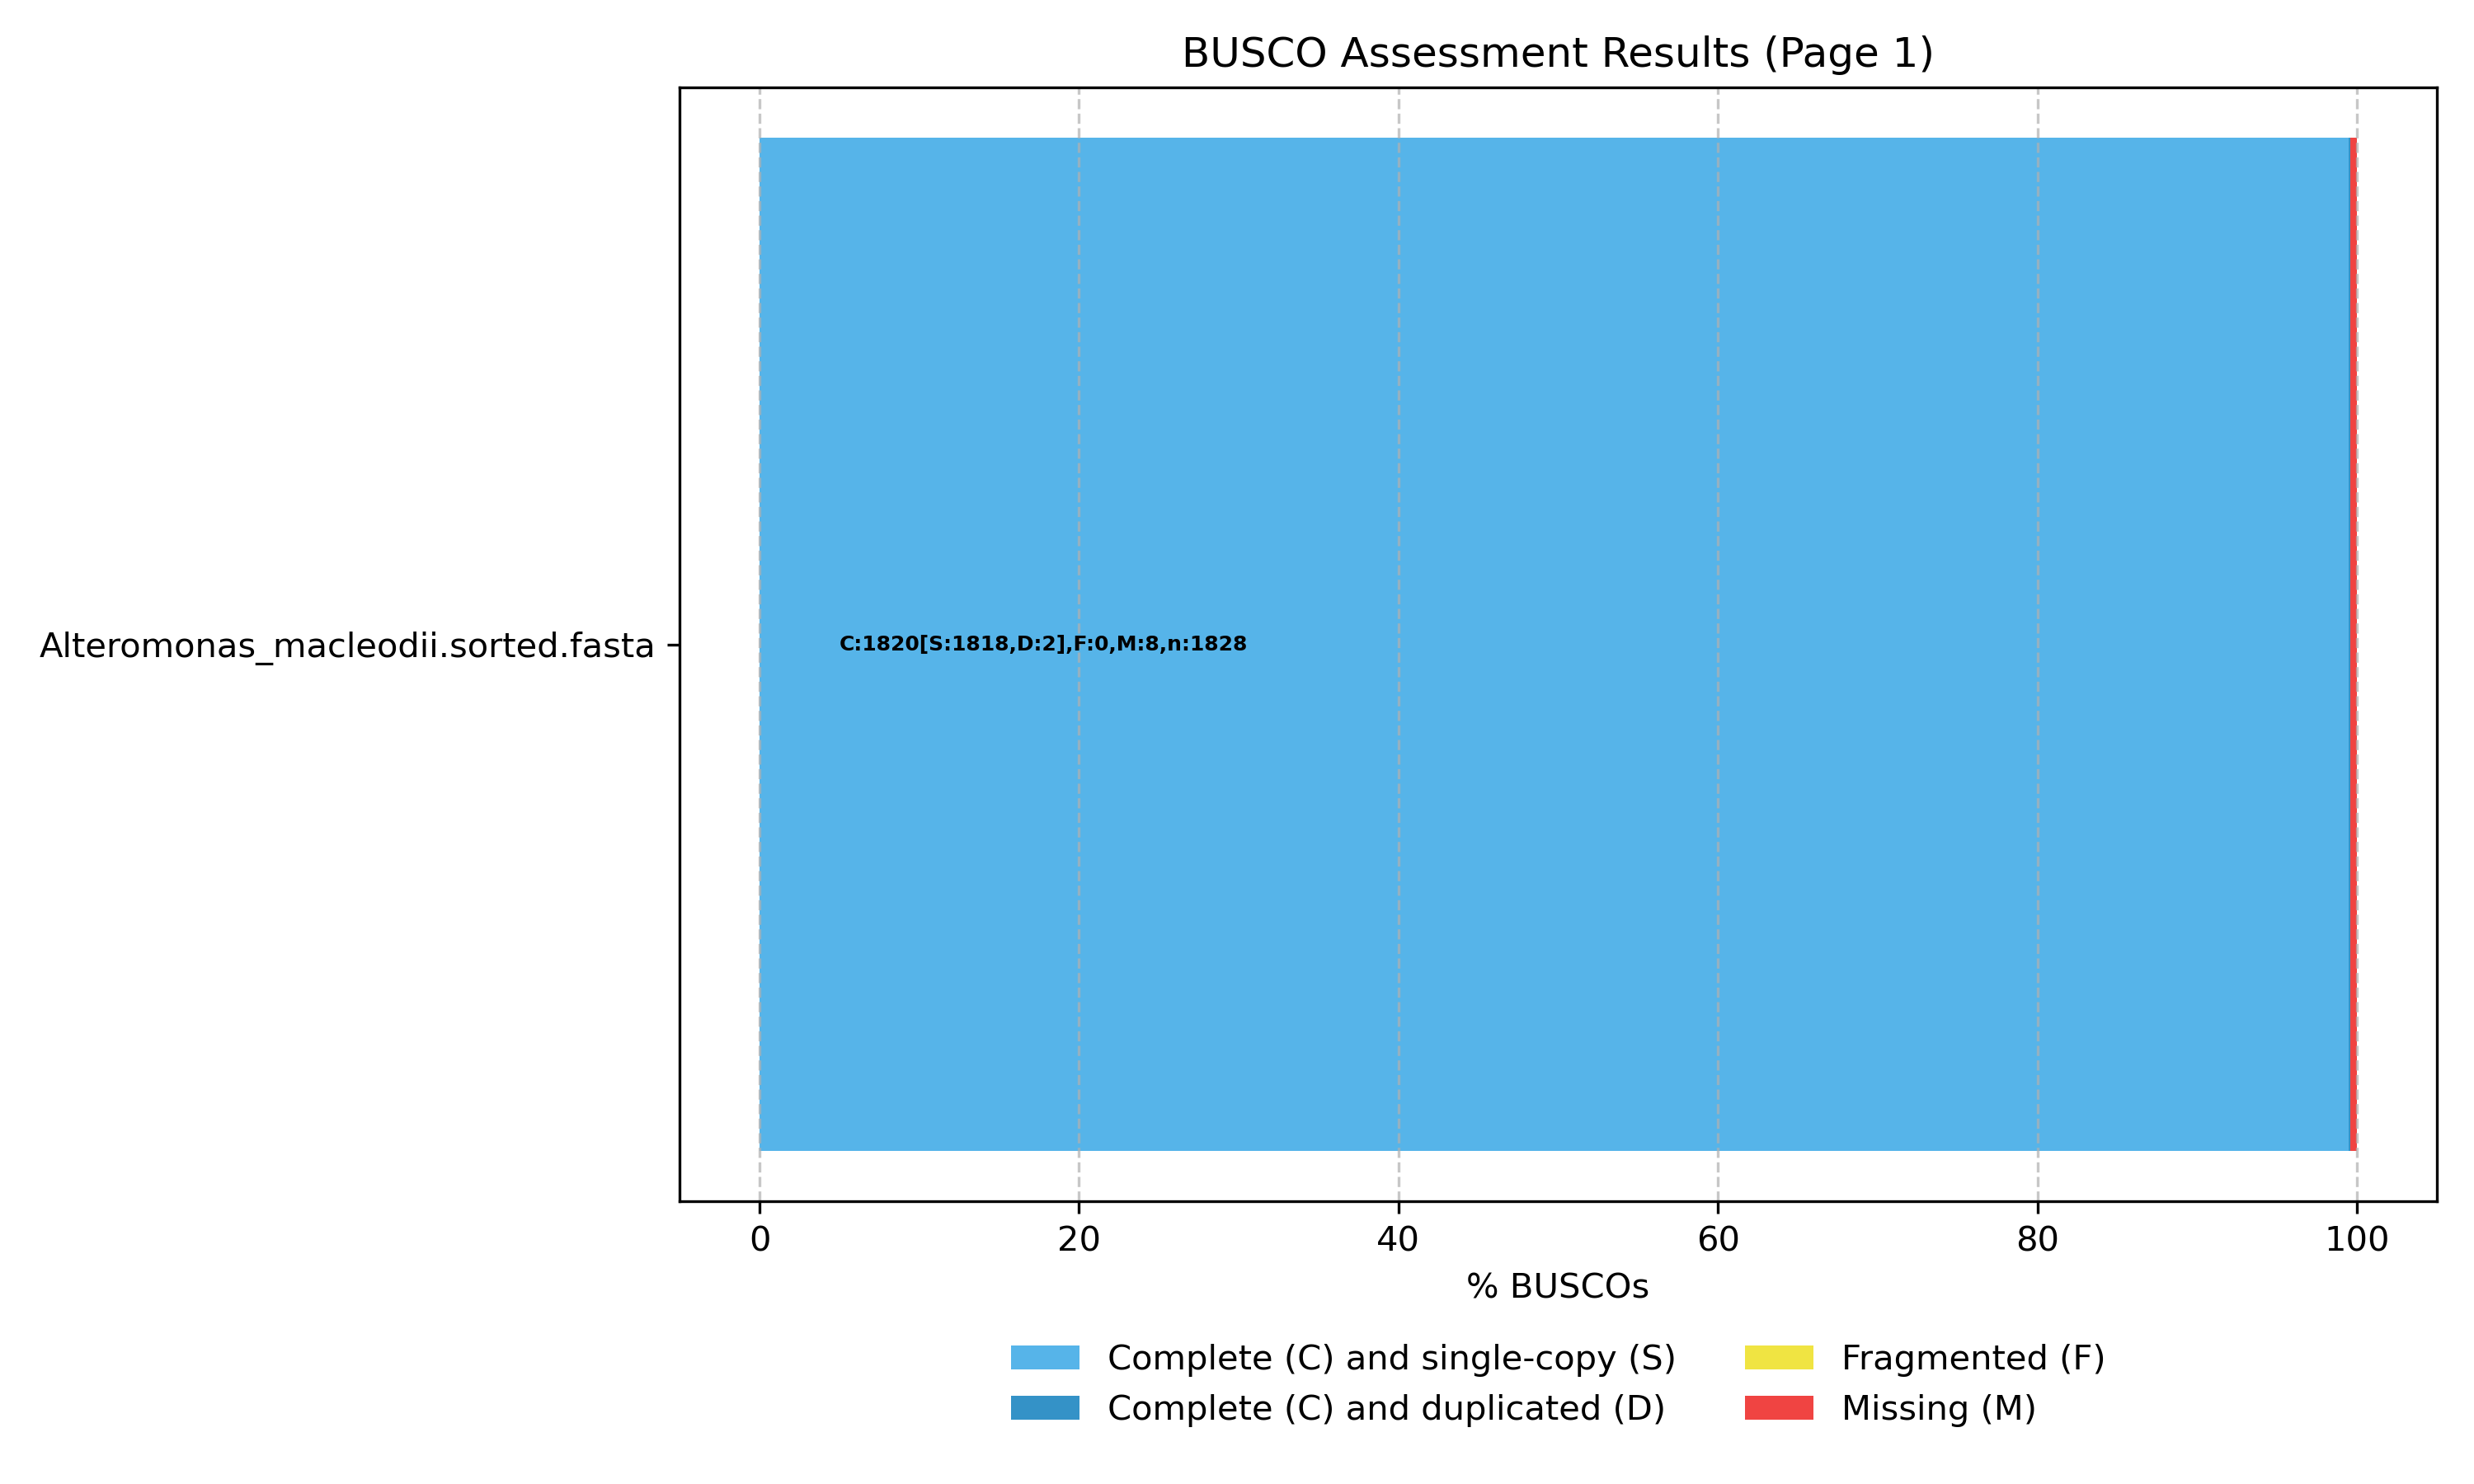

In [18]:
image3_filename = "busco_figure.png"
display(Markdown(f"\n### <span style='font-family: Georgia, serif;'>2. BUSCO Plot ({image3_filename})</span>"))
try:
    if os.path.exists(image3_filename):
        display(Image(filename=image3_filename, width=600))
    else:
        display(Markdown(f"**ERROR:** Image file not found at: `{image3_filename}`"))
except Exception as e:
    display(Markdown(f"An error occurred displaying `{image3_filename}`: {e}"))

### <span style="font-family: 'Georgia', serif;"> Task Number 5 - How successful was I at generating a high quality assembly? </span>
<span style="font-family: 'Georgia', serif;"> This experiment was successful in generating a high quality assembly through a myriad of statistics when comparing this assembly to the reference. The genome size for this assembly is 4,627,920 while the reference size is 4,653,851 which are pretty comparable. The N50s (4.7MB), number of chromosomes (1), number of scaffolds (1), number of contigs (1) are pretty similar or the exact same. Also the GC contents are similar where it is 44.70% for this assembly and 44.71% for the reference. A duplication ratio of 1.001 is ideal as the closer it is to 1.00, the less execessive copies of the same sequence is present. A number of mismatches per 100kb is also ideal as generally less than 20 is the goal and the lower the number tells us higher accuracy. A 98.429% genomic fraction is not the most ideal, but still great as this fraction tells us 98.429% of the reference genome is covered by this assembly.</span>

### <span style="font-family: 'Georgia', serif;"> References </span>
1. <span style="font-family: 'Georgia', serif;"> Andrews, S. (2010). FastQC:  A Quality Control Tool for High Throughput Sequence Data [Online]. Available online at: http://www.bioinformatics.babraham.ac.uk/projects/fastqc/</span>
2. <span style="font-family: 'Georgia', serif;">Wick, R. (2017). Filtlong (Version 0.3.0) [Computer software]. GitHub. https://github.com/rrwick/Filtlong. </span>
3. <span style="font-family: 'Georgia', serif;">Kolmogorov, M., Yuan, J., Lin, Y., & Pevzner, P. A. (2019). Assembly of long, error-prone reads using repeat graphs. Nature Biotechnology, 37(5), 540–546. doi:10.1038/s41587-019-0072-8 </span>
4. <span style="font-family: 'Georgia', serif;">Langmead, B., & Salzberg, S. L. (2012). Fast gapped-read alignment with Bowtie 2. Nature methods, 9(4), 357–359. https://doi.org/10.1038/nmeth.1923</span>
5. <span style="font-family: 'Georgia', serif;">Danecek, P., Bonfield, J. K., Liddle, J., Marshall, J., Ohan, V., Pollard, M. O., Whitwham, A., Keane, T., McCarthy, S. A., Davies, R. M., & Li, H. (2021). Twelve years of SAMtools and BCFtools. GigaScience, 10(2), giab008. https://doi.org/10.1093/gigascience/giab008</span>
6. <span style="font-family: 'Georgia', serif;">Walker BJ, Abeel T, Shea T, Priest M, Abouelliel A, Sakthikumar S, et al. (2014) Pilon: An Integrated Tool for Comprehensive Microbial Variant Detection and Genome Assembly Improvement. PLoS ONE 9(11): e112963. https://doi.org/10.1371/journal.pone.0112963</span>
7. <span style="font-family: 'Georgia', serif;">Seemann T. (2014). Prokka: rapid prokaryotic genome annotation. Bioinformatics (Oxford, England), 30(14), 2068–2069. https://doi.org/10.1093/bioinformatics/btu153</span>
8. <span style="font-family: 'Georgia', serif;">Seppey, M., Manni, M., & Zdobnov, E. M. (2019). BUSCO: Assessing Genome Assembly and Annotation Completeness. Methods in molecular biology (Clifton, N.J.), 1962, 227–245. https://doi.org/10.1007/978-1-4939-9173-0_14</span>
9. <span style="font-family: 'Georgia', serif;">O’Leary, N. A., Cox, E., Holmes, J. B., Anderson, W. R., Falk, R., Hem, V., Tsuchiya, M. T. N., Schuler, G. D., Zhang, X., Torcivia, J., Ketter, A., Breen, L., Cothran, J., Bajwa, H., Tinne, J., Meric, P. A., Hlavina, W., & Schneider, V. A. (2024). Exploring and retrieving sequence and metadata for species across the tree of life with NCBI Datasets. Scientific Data, 11(1), 732. https://doi.org/10.1038/s41597-024-03571-y </span>
10. <span style="font-family: 'Georgia', serif;">Gurevich, A., Saveliev, V., Vyahhi, N., & Tesler, G. (2013). QUAST: quality assessment tool for genome assemblies. Bioinformatics (Oxford, England), 29(8), 1072–1075. https://doi.org/10.1093/bioinformatics/btt086</span>